In [61]:
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

Vx = 10
Vy = 8

x = np.arange(0,10)
y = np.arange(0,10)

X, Y = np.meshgrid(x,y)
u = np.ones((10,10)) # x-component to the right
v = np.ones((10,10)) * (Vy / Vx) # y-component zero


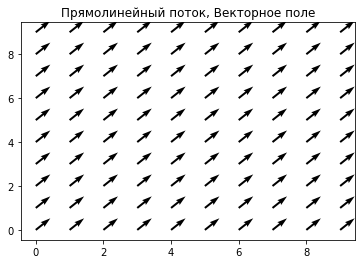

In [62]:
fig, ax = plt.subplots()

ax.quiver(X,Y,u,v)
ax.set_title('Прямолинейный поток, Векторное поле')
plt.show()



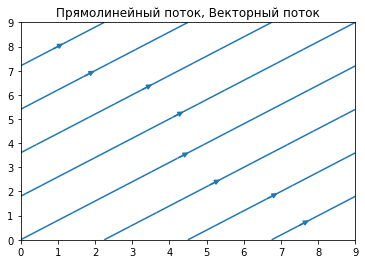

In [65]:
fig, ax = plt.subplots()
ax.streamplot(X,Y,u,v, density=0.3)
ax.set_title('Прямолинейный поток, Векторный поток')
plt.show()